## Законы распределения ДСВ в Python

### Задача с биномиальным распределением 


In [1]:
import numpy as np
from scipy.stats import binom, poisson, geom, hypergeom
import pandas as pd
import matplotlib.pyplot as plt

np.set_printoptions(formatter={'float_kind': '{:0.4f}'.format})
pd.options.display.float_format = '{:,.4f}'.format

Вероятность того, что один купленный лотерейный билет выигрывает, равна 0,12. Вася покупает 25 таких билетов. Составьте закон распределения числа выигравших билетов среди приобретённых 25 Найдите математическое ожидание, дисперсию, среднее квадратическое отклонение и моду случайной величины числа выигравших билетов.

In [2]:
import numpy as np
import pandas as pd
from scipy.stats import binom

n, p = 25, 0.12
X = np.arange(0, n + 1)

binomial_dist = binom(n, p)
probabilities = binomial_dist.pmf(X)
mean = binomial_dist.mean()
disp = binomial_dist.var()
asd = binomial_dist.std()
max_prob = probabilities.max()
mode = [int(x) for x in X if round(probabilities[x], 6) == round(max_prob, 6)]
df = pd.DataFrame(data=probabilities, index=X, columns=['p']).T

print(df)
print(f'Математическое ожидание: {mean:.4f}')
print(f'Дисперсия: {disp:.4f}')
print(f'Среднее квадратическое отклонение: {asd:.4f}')
print(f'Мода: {mode}')

      0      1      2      3      4      5      6      7      8      9   ...  \
p 0.0409 0.1395 0.2283 0.2387 0.1790 0.1025 0.0466 0.0173 0.0053 0.0014  ...   

      16     17     18     19     20     21     22     23     24     25  
p 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000  

[1 rows x 26 columns]
Математическое ожидание: 3.0000
Дисперсия: 2.6400
Среднее квадратическое отклонение: 1.6248
Мода: [3]


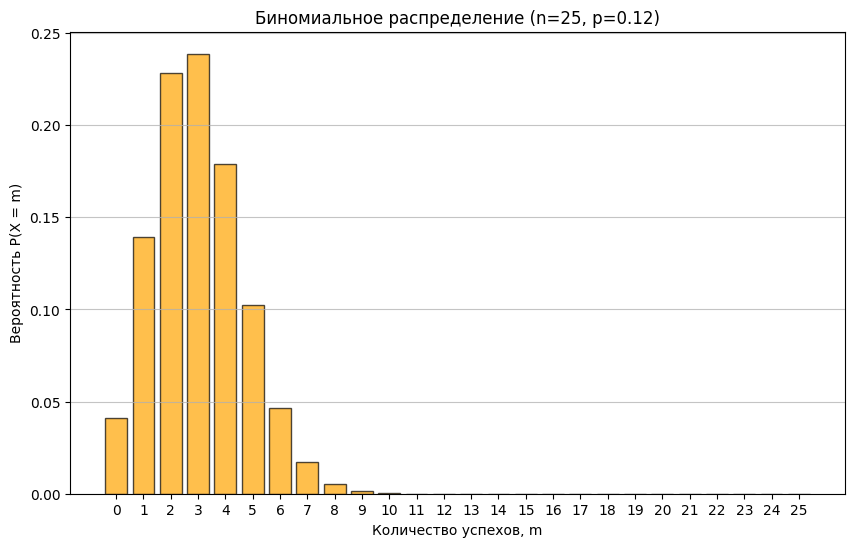

In [3]:
plt.figure(figsize=(10, 6))
plt.bar(X, probabilities, color='orange', edgecolor='black', alpha=0.7)
plt.title(f'Биномиальное распределение (n={n}, p={p})')
plt.xlabel('Количество успехов, m')
plt.ylabel('Вероятность P(X = m)')
plt.xticks(X)
plt.grid(axis='y', alpha=0.75)
plt.show()

### Задача с распределением Пуассона

Количество звонков, поступающих в службу поддержки за 5 минут - случайная величина, распределенная по закону Пуассона с параметром λ = 4.2. Найти вероятность события А - за 5 минут поступит более 2 звонков

      0      1      2      3      4      5      6      7      8      9   \
p 0.0150 0.0630 0.1323 0.1852 0.1944 0.1633 0.1143 0.0686 0.0360 0.0168   

      10     11     12     13     14  
p 0.0071 0.0027 0.0009 0.0003 0.0001  
Математическое ожидание: 4.2000
Дисперсия: 4.2000
Среднее квадратическое отклонение: 2.0494
Мода: [4]


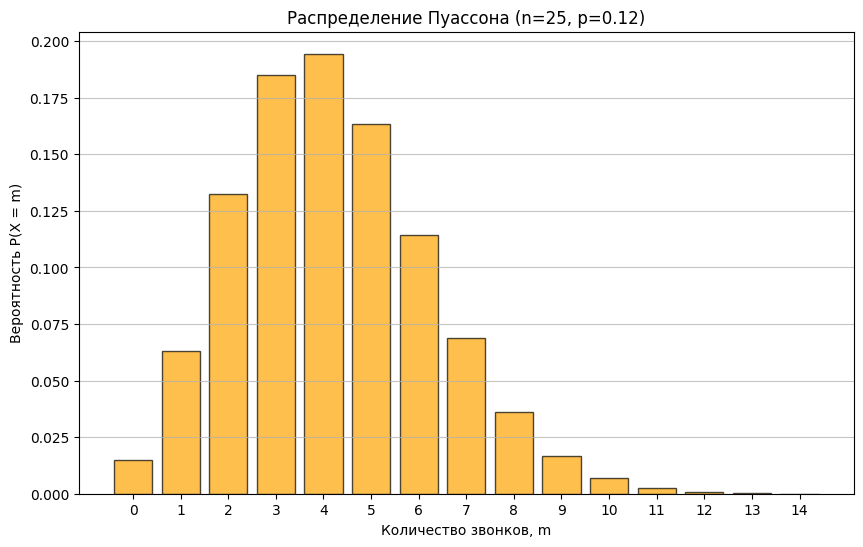

In [4]:
lmb = 4.2
X = np.arange(0, 15)

poisson_dist = poisson(lmb)
probabilities = poisson_dist.pmf(X)

df = pd.DataFrame(data=probabilities, index=X, columns=['p']).T
mean = poisson_dist.mean()
disp = poisson_dist.var()
asd = poisson_dist.std()
max_prob = probabilities.max()
mode = [int(x) for x in X if round(probabilities[x], 6) == round(max_prob, 6)]

print(df)
print(f'Математическое ожидание: {mean:.4f}')
print(f'Дисперсия: {disp:.4f}')
print(f'Среднее квадратическое отклонение: {asd:.4f}')
print(f'Мода: {mode}')

plt.figure(figsize=(10, 6))
plt.bar(X, probabilities, color='orange', edgecolor='black', alpha=0.7)
plt.title(f'Распределение Пуассона (n={n}, p={p})')
plt.xlabel('Количество звонков, m')
plt.ylabel('Вероятность P(X = m)')
plt.xticks(X)
plt.grid(axis='y', alpha=0.75)
plt.show()

### Геометрическое распределение

Производится ряд попыток завести двигатель, каждая попытка длительностью 10 с заканчивается запуском двигателя независимо от других с вероятностью p = 0.7. Найти распределение количества попыток запуска двигателя. Вычислите математическое ожидание и дисперсию случайной величины. Определеить вероятность того, что для запуска двигателя потребуется не менее 3 попыток.

      1      2      3      4      5      6      7      8      9      10  \
p 0.7000 0.2100 0.0630 0.0189 0.0057 0.0017 0.0005 0.0002 0.0000 0.0000   

      11     12     13     14  
p 0.0000 0.0000 0.0000 0.0000  
Математическое ожидание: 1.4286
Дисперсия: 0.6122
Среднее квадратическое отклонение: 0.7825
Вероятность того, что для запуска двигателя потребуется не менее 3 попыток: 0.0081


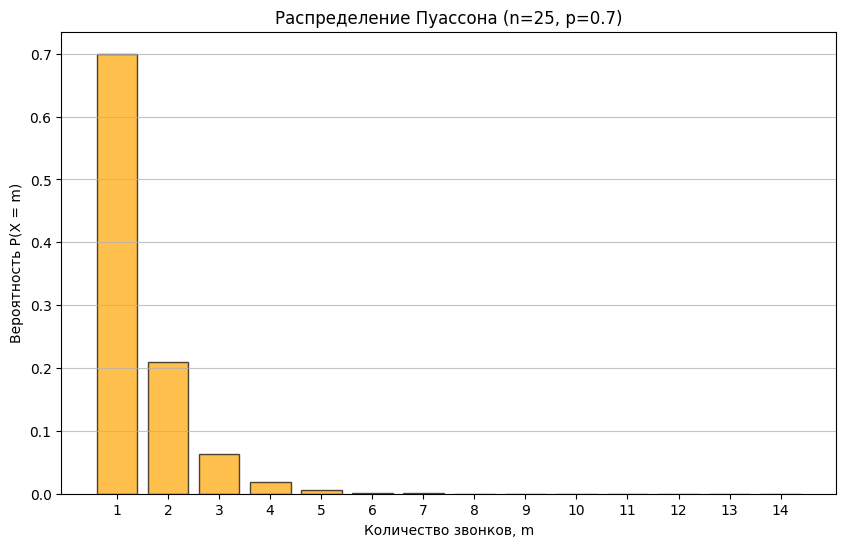

In [5]:
p = 0.7

X = np.arange(1, 15)
geom_dist = geom(p)
probabilities = geom_dist.pmf(X)
df = pd.DataFrame(data=probabilities, index=X, columns=['p']).T
mean = geom_dist.mean()
disp = geom_dist.var()
asd = geom_dist.std()
max_prob = probabilities.max()
#mode = [int(x) for x in X if round(probabilities[x], 6) == round(max_prob, 6)]
prob = 1 - probabilities[:4].sum()

print(df)
print(f'Математическое ожидание: {mean:.4f}')
print(f'Дисперсия: {disp:.4f}')
print(f'Среднее квадратическое отклонение: {asd:.4f}')
#print(f'Мода: {mode}')
print(f'Вероятность того, что для запуска двигателя потребуется не менее 3 попыток: {prob:.4f}')

plt.figure(figsize=(10, 6))
plt.bar(X, probabilities, color='orange', edgecolor='black', alpha=0.7)
plt.title(f'Распределение Пуассона (n={n}, p={p})')
plt.xlabel('Количество звонков, m')
plt.ylabel('Вероятность P(X = m)')
plt.xticks(X)
plt.grid(axis='y', alpha=0.75)
plt.show()


### Гипергеометрическое распределение

В партии имеется 13 новых детали и пять бывших в употреблении. Наудачу отобраны три детали: составить закон распределения случайной величины – числа новых деталей среди отобранных, найти МО и дисперсию этой случайной величины. определить вероятность того, что среди выбранных деталей нет бывших в использовании.

       0      1      2      3
p 0.0123 0.1593 0.4779 0.3505
Математическое ожидание: 2.1667
Дисперсия: 0.5310
Среднее квадратическое отклонение: 0.7287
Детали не были в использовании 0.3505


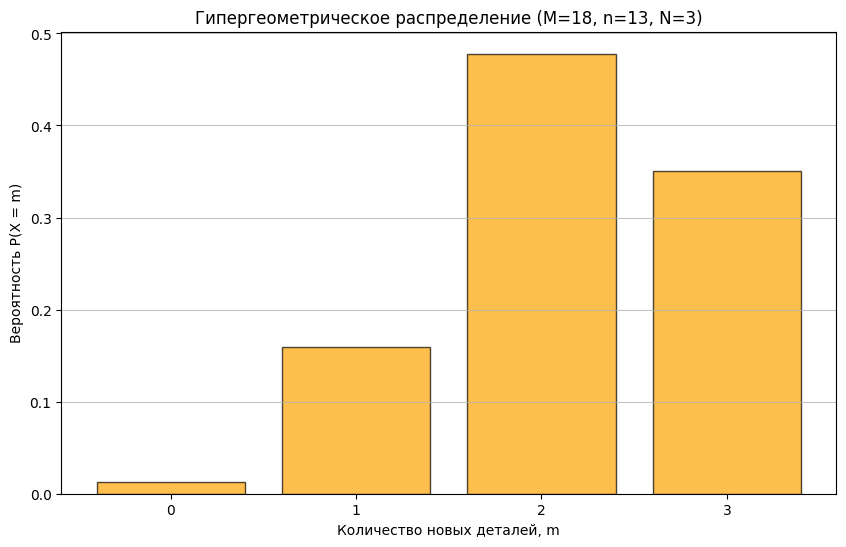

In [6]:
import numpy as np
import pandas as pd
from scipy.stats import hypergeom

M = 18   
n = 13   
N = 3    

X = np.arange(0, N + 1)
hypergeom_dist = hypergeom(M, n, N)
probabilities = hypergeom_dist.pmf(X)
df = pd.DataFrame(data=probabilities, index=X, columns=['p']).T
mean = hypergeom_dist.mean()
disp = hypergeom_dist.var()
asd = hypergeom_dist.std()
p_all_new = hypergeom_dist.pmf(3)

print(df)
print(f'Математическое ожидание: {mean:.4f}')
print(f'Дисперсия: {disp:.4f}')
print(f'Среднее квадратическое отклонение: {asd:.4f}')
print(f'Детали не были в использовании {p_all_new:.4f}')

plt.figure(figsize=(10, 6))
plt.bar(X, probabilities, color='orange', edgecolor='black', alpha=0.7)
plt.title(f'Гипергеометрическое распределение (M={M}, n={n}, N={N})')
plt.xlabel('Количество новых деталей, m')
plt.ylabel('Вероятность P(X = m)')
plt.xticks(X)
plt.grid(axis='y', alpha=0.75)
plt.show()